In [1]:

# 📍 Day 1 – Points: Mapping EV Charging Stations in Chicago

#This project visualizes the spatial distribution of electric vehicle (EV) charging stations across Chicago using OpenStreetMap data. It leverages Python libraries such as **OSMnx**, **GeoPandas**, and **Folium** to extract, process, and display point-based infrastructure on an interactive map.

#Challenge Theme:** Points  
#Tools Used:** Python, OSMnx, GeoPandas, Folium  
#Location:** Chicago, Illinois, USA  
#Goal:** Showcase point-based spatial data and interactive mapping for sustainable urban infrastructure.







### Day 1 – Points: Mapping EV Charging Stations in Chicago

In [2]:
pip install osmnx geopandas folium notebook


Note: you may need to restart the kernel to use updated packages.


In [3]:
import osmnx as ox
import geopandas as gpd
import folium
import matplotlib

In [4]:
# Printing OSMnx version
print("OSMnx version:", ox.__version__)

OSMnx version: 1.2.2


In [5]:
# add variable def of  city
city_name = "Chicago, Illinois, USA"

<AxesSubplot: >

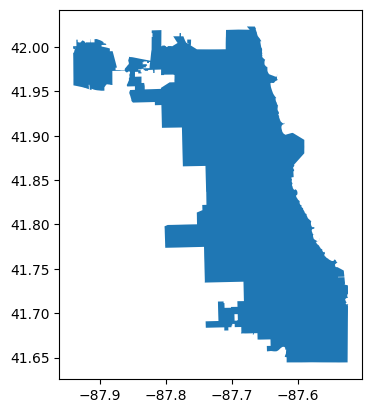

In [6]:
# lets have administrative boundary
admin = ox.geocode_to_gdf(city_name)
admin.plot()

In [7]:
ev_chargers = ox.geometries_from_place(city_name, tags={"amenity": "charging_station"})


In [8]:
# loading EV charging station data from OpenStreetMap
ev_chargers = ox.geometries_from_place(city_name, tags={"amenity": "charging_station"})
print("EV Charging Stations:", len(ev_chargers))


EV Charging Stations: 62


In [9]:
# turn polygons to point geometries (centroids)
def to_points(gdf):
    if gdf.empty:
        return gdf
    return gdf.to_crs(3857).centroid.to_crs(4326).to_frame("geometry")

ev_chargers = to_points(ev_chargers)

In [10]:
# calculating map bounds and center
minx, miny, maxx, maxy = admin.total_bounds
fit_bounds = [[miny, minx], [maxy, maxx]]
center = [(miny + maxy) / 2, (minx + maxx) / 2]

In [11]:
# creating base map
m = folium.Map(location=center, tiles="CartoDB dark_matter", control_scale=True)

In [12]:
#creating layer groups
admin_layer = folium.FeatureGroup(name="Admin Boundary", show=True)
ev_layer = folium.FeatureGroup(name="EV Charging Stations", show=True)

In [13]:
#adding administrative boundary to map
folium.GeoJson(
    admin,
    style_function=lambda feature: {
        "fillColor": "#ffffff",
        "color": "#ffffff",
        "weight": 3,
        "fillOpacity": 0.15
    }
).add_to(admin_layer)

admin_layer.add_to(m)

In [14]:
# Functioning to add point features to map
def add_points(gdf, feature_group, color):
    if gdf is not None and not gdf.empty:
        for _, row in gdf.iterrows():
            geom = row.geometry
            if geom is None:
                continue
            lat, lon = geom.y, geom.x
            folium.CircleMarker(
                location=[lat, lon],
                radius=2,
                weight=0.5,
                fill=True,
                fill_opacity=0.8,
                color=color,
                fill_color=color,
            ).add_to(feature_group)

# adding EV charging station points
add_points(ev_chargers, ev_layer, "#00ff00")  # green

# adding layers to map
ev_layer.add_to(m)
folium.LayerControl(collapsed=False, position="topright").add_to(m)

# fitting map to city bounds
if fit_bounds:
    m.fit_bounds(fit_bounds)

# lets save it map to HTML
m.save("chicago_ev_charging_stations.html")

# Displaing map (only works in Jupyter Notebook)
m


In [15]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium

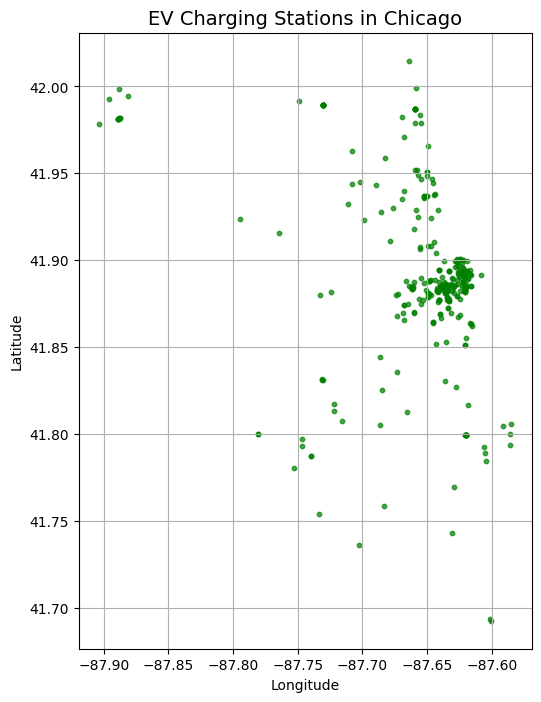

In [16]:


# Load CSV from my computer
df = pd.read_csv("/Users/pallabibhattacharya/Desktop/chicago_ev_chargers.csv")

# Convert to GeoDataFrame using right column names
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']),
    crs="EPSG:4326"
)

# Plot using GeoPandas (built on Matplotlib)
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(ax=ax, color='green', markersize=10, alpha=0.7)

# title and labels
ax.set_title("EV Charging Stations in Chicago", fontsize=14)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.grid(True)

plt.show()


### Now lets do this by using follium

In [17]:
# pulling CSV from my computer files
df = pd.read_csv("/Users/pallabibhattacharya/Desktop/chicago_ev_chargers.csv")

# change to GeoDataFrame using latitude and longitude columns
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']),
    crs="EPSG:4326"
)



In [18]:


# Calculating map bounds and center
minx, miny, maxx, maxy = gdf.total_bounds
fit_bounds = [[miny, minx], [maxy, maxx]]
center = [(miny + maxy) / 2, (minx + maxx) / 2]

# Creating Folium map
m = folium.Map(location=center, tiles="CartoDB dark_matter", control_scale=True)

# Creating layer for EV charging stations
ev_layer = folium.FeatureGroup(name="EV Charging Stations", show=True)

# Adding each point to the map with popup
for _, row in gdf.iterrows():
    lat, lon = row.geometry.y, row.geometry.x

    # Creating popup content with name and address
    popup_text = f"""
    <b>{row.get('Station Name', 'EV Charger')}</b><br>
    {row.get('Street Address', 'Address not available')}<br>
    {row.get('City', '')}, {row.get('State', '')} {row.get('ZIP', '')}
    """

    folium.CircleMarker(
        location=[lat, lon],
        radius=3,
        weight=0.5,
        fill=True,
        fill_opacity=0.8,
        color="#00ff00",
        fill_color="#00ff00",
        popup=folium.Popup(popup_text, max_width=250)
    ).add_to(ev_layer)

# Adding layer to map
ev_layer.add_to(m)
folium.LayerControl(collapsed=False, position="topright").add_to(m)

# Fiting map to bounds
if fit_bounds:
    m.fit_bounds(fit_bounds)

# hiting the save map to HTML
m.save("chicago_ev_charging_csv_map.html")

# Now finally lets Display the map (in Jupyter Notebook only)
m
